In [88]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [2]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [5]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [32]:
# 2. Show the count of missing values in each column
for i in killings.columns:
    if killings[i].dtype == 'O':
        print i, len(killings[killings[i]==''])
        
killings.isnull().sum()

name 0
gender 0
race 0
month 0
streetaddress 0
city 0
state 0
agency 0
cause 0
armed 0


Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [36]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value = 'Unknown', inplace = True)

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [49]:
# 4. How many killings were there so far in 2015?
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [52]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').gender.value_counts()

gender  gender
Female  Female     22
Male    Male      445
dtype: int64

In [59]:
# 6. How many killings were of unarmed people?
killings[killings['armed']=='No'].armed.value_counts()

No    102
Name: armed, dtype: int64

In [74]:
# 7. What percentage of all killings were unarmed?
float(killings[killings['armed']=='No'].armed.count())/killings.armed.count()*100


,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [85]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head()
killings.groupby('state').state.count().order(ascending=False).head()

/Users/pgao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [86]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

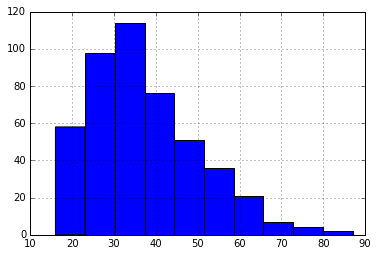

In [100]:
# 10. Display a histogram of ages of all killings
import matplotlib.pyplot as plt
%matplotlib inline
killings.age.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b8bb490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc8bc10>]], dtype=object)

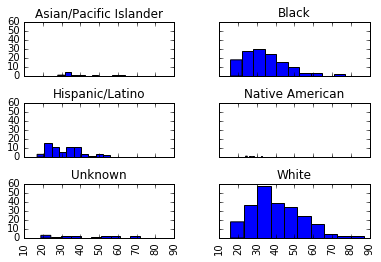

In [105]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [108]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

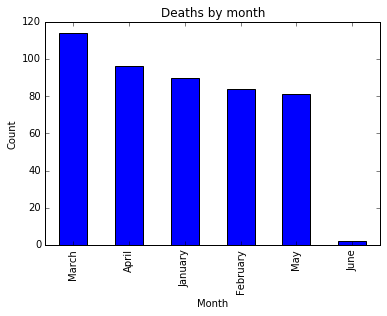

In [123]:
# 13. Show a bar chart with counts of deaths every month

month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}
# not sure how to order x-axis by chronological order
killings.month.value_counts().plot(kind='bar', title='Deaths by month')
plt.xlabel('Month')
plt.ylabel('Count')

In [ ]:
###################
### Less Morbid ###
###################

In [124]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [126]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [129]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [139]:
# 3. What are the top 10 highest paying majors?
majors[['Major','Median']].sort_index(by='Median', ascending=False).head(10)

/Users/pgao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


/Users/pgao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


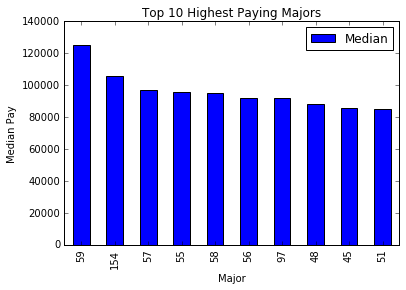

In [152]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
topten = majors[['Major','Median']].sort_index(by='Median', ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Highest Paying Majors')
plt.ylabel('Median Pay')
plt.xlabel('Major')
#not sure how to get majors instead of index for x axis

In [ ]:
# 5. What is the average median salary for each major category?

In [ ]:
# 6. Show only the top 5 paying major categories

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [ ]:
# 9. What are the top 10 most UNemployed majors?

In [ ]:
# What are the unemployment rates?

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"

In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [ ]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

In [ ]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

In [ ]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

In [ ]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [ ]:
# 2 Which ten business have had the most inspections?

In [ ]:
# 3 Group and count the inspections by type

In [ ]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [ ]:
# 5 Which zip code contains the most high risk violations?

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 What street has the best (safest) restaurants to dine out at?

In [ ]:
# 9 Create a hist of the scores with 10 bins

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/